In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv('Churn_Modelling.csv')

In [33]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [34]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [35]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [37]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

### Insight: Imbalance dataset

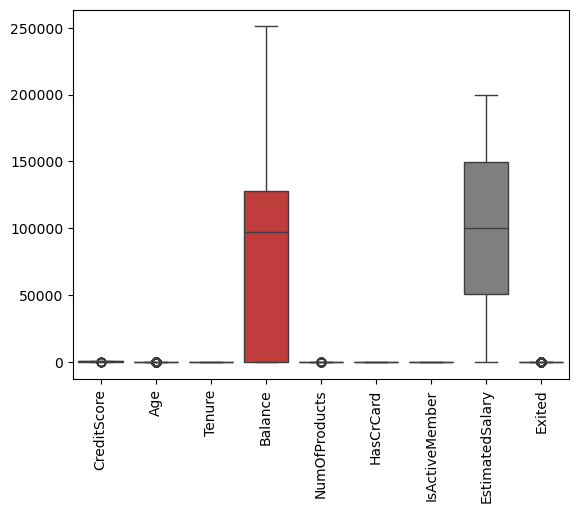

In [38]:
# Checking for outliers
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

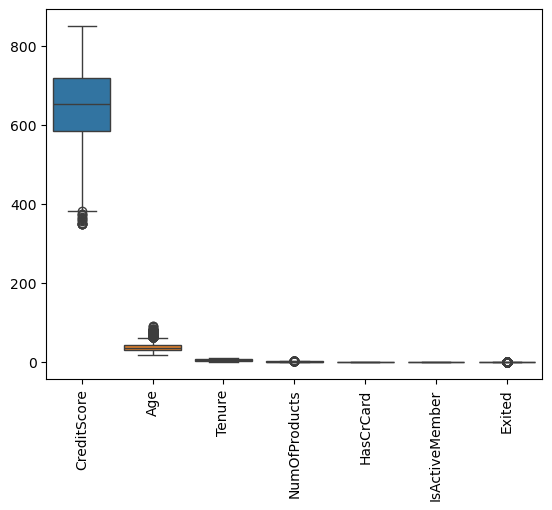

In [39]:
# Dropping 'Balance' and 'EstimatedSalary' feature since there was no outliers in them.
sns.boxplot(df.drop(['Balance', 'EstimatedSalary'], axis=1))
plt.xticks(rotation=90)
plt.show()

In [40]:
# Converting to categorical feature so that the following function will not act on it.  
df['Exited'] = df['Exited'].replace({1: 'Yes', 0: 'No'})

In [41]:
def remove_numerical_outliers(df):
    '''
    Function to remove outliers for numerical features
    '''
    # Apply IQR for numerical columns
    numerical_cols = df.select_dtypes(include=['number']).columns
    Q1 = df[numerical_cols].quantile(0.25)
    Q3 = df[numerical_cols].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the condition for outliers
    condition = ~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
    
    # Return the DataFra
    return df[condition]

In [42]:
# Removing outliers
df = remove_numerical_outliers(df)

In [43]:
# Coverting back to numerical feature
df['Exited'] = df['Exited'].replace({'Yes': 1, 'No': 0})

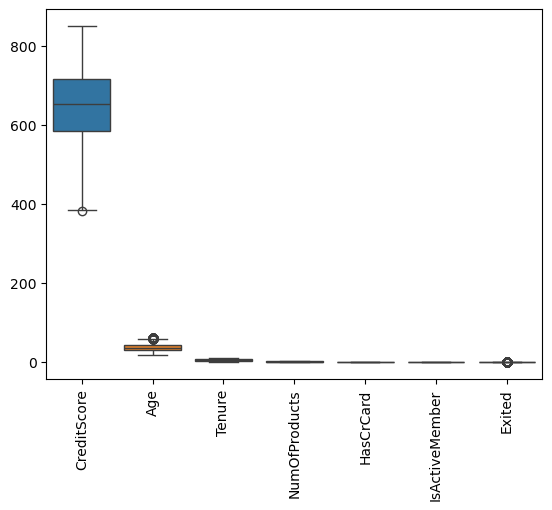

In [44]:
# Again checking for outliers
sns.boxplot(df.drop(['Balance', 'EstimatedSalary'], axis=1))
plt.xticks(rotation=90)
plt.show()

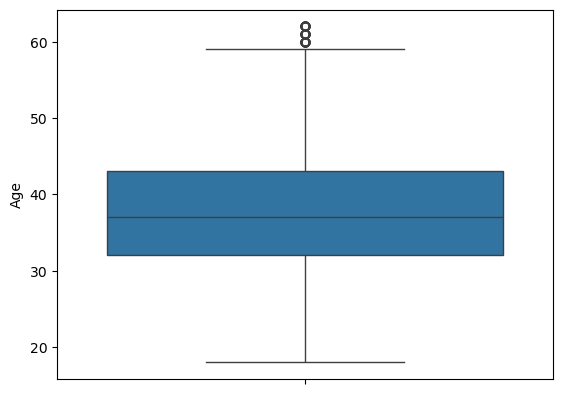

In [45]:
# Ignoring few outliers for Age
sns.boxplot(df['Age'])
plt.xticks(rotation=90)
plt.show()

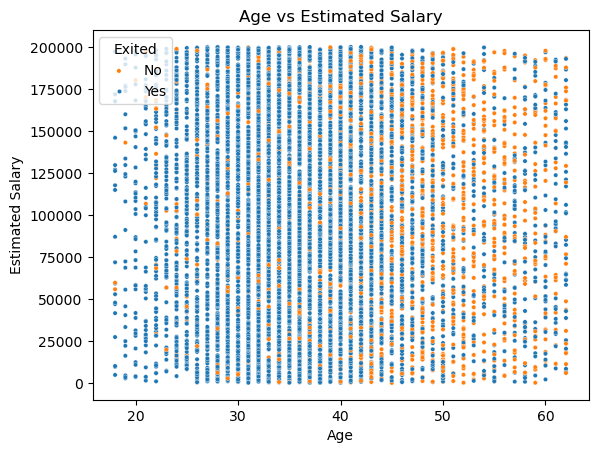

In [46]:
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Exited', s=10)
plt.legend(labels=['No', 'Yes'], title='Exited')
plt.title('Age vs Estimated Salary')
plt.ylabel('Estimated Salary')
plt.show()

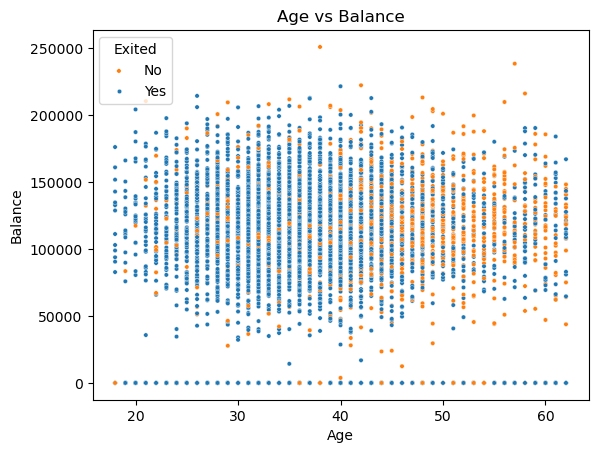

In [47]:
sns.scatterplot(data=df, x='Age', y='Balance', hue='Exited', s=10)
plt.legend(labels=['No', 'Yes'], title='Exited')
plt.title('Age vs Balance')
plt.show()

### Insights: Customer tend to churn after age of 40 irrespective to their salary and balance.

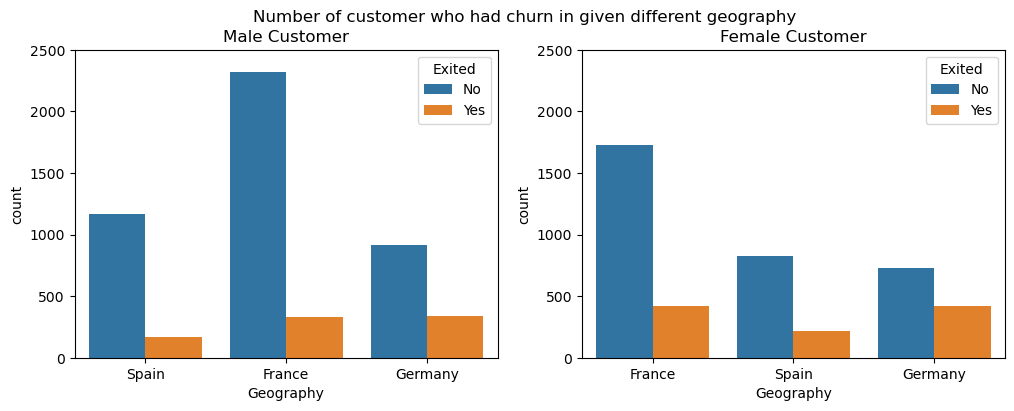

In [67]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Male Customer')
plt.ylim(0, 2500)
sns.countplot(df[df['Gender']=='Male'], x='Geography', hue='Exited')
plt.legend(labels=['No', 'Yes'], title='Exited')

plt.subplot(1,2,2)
plt.title('Female Customer')
plt.ylim(0, 2500)
sns.countplot(df[df['Gender']=='Female'], x='Geography', hue='Exited')
plt.legend(labels=['No', 'Yes'], title='Exited')

plt.suptitle('Number of customer who had churn in given different geography')
plt.show()

### Insights: Female customer churned more than males.